In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt

In [3]:
def moving_avg_fcst(dataset):
    dataset['predicted'] = dataset['runs_batsman'].rolling(window = 8).mean().shift(1)
    train, test = train_test_split(dataset, test_size = 0.3, random_state=42)
    r2 = r2_score(test[test['predicted'].notna() == True]['runs_batsman'], test[test['predicted'].notna() == True]['predicted'])
    mae = mean_absolute_error(test[test['predicted'].notna() == True]['runs_batsman'], test[test['predicted'].notna() == True]['predicted'])
    print("Moving average forecast r sq: ",round(r2*100,2),"%")
    print("Moving average forecast mae: ",round(mae,2))
    return(train, test)

In [49]:
def plot_fcst(train, test):
    train['predicted'] = np.nan
    plot_data = train.append(test)
    title = plot_data['batsman'].unique()[0]
    plot_data = plot_data.sort_values(['batsman', 'match_date','match_type'], ascending=[True, True, True])
    plot_data = plot_data.tail(50)
    plot_data.plot(x = "match_date", y = ["runs_batsman", "predicted"], kind="bar"
                   ,title = title, figsize = (16, 8), fontsize = 10, legend = True)
    plt.show()

In [5]:
def run_model(dataset):
    train, test = train_test_split(dataset, test_size = 0.3, random_state=42)
    
    train, test = moving_avg_fcst(dataset)

    plot_fcst(train, test)

In [6]:
player_1 = pd.read_csv("RG_Sharma.csv")

Moving average forecast r sq:  -20.62 %
Moving average forecast mae:  20.73


/Users/z001t72/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


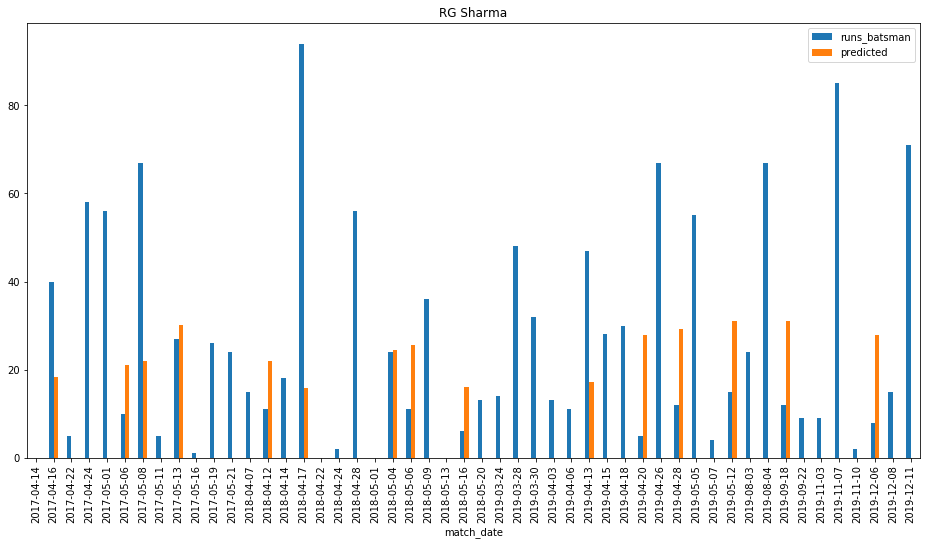

In [7]:
run_model(player_1)

linear regression

In [8]:
import statsmodels.api as sm

In [12]:
player_1 = player_1.dropna()

In [13]:
train, test = train_test_split(player_1, test_size = 0.3, random_state=42)

In [14]:
input_columns = ['innings_number','moving_average','avg_runs_innings_1','avg_runs_innings_2']

In [28]:
X = train[input_columns]
# X = train_use1[['dow',
#                 'temperature_difference','temperature_difference_lag_1','temperature_difference_lag_2',
#                 'temperature_difference_lag_3','temperature_difference_lag_4',
#                 'temperature_difference_start_end']]
y = train['runs_batsman']
# X = sm.add_constant(X)

In [29]:
model = sm.OLS(y, X).fit()

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           runs_batsman   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     13.17
Date:                Fri, 14 Feb 2020   Prob (F-statistic):           2.33e-07
Time:                        15:53:33   Log-Likelihood:                -247.23
No. Observations:                  53   AIC:                             502.5
Df Residuals:                      49   BIC:                             510.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
innings_number         3.8912      7.512      0.518      0.607     -11.204      18.987
moving_average        -0.3015      0.485     -0.622      0.537      -1.276       0.673
avg_runs_innings_1     0.0224      0.527      0.043      0.966      -1.036       1.081
avg_runs_innings_2     0.1677      0.517      0.324      0.747      -0.872       1.207
==============================================================================
Omnibus:                        7.398   Durbin-Watson:                   2.503
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.682
Skew:                           0.924   Prob(JB):                       0.0215
Kurtosis:                       2.748   Cond. No.                         452.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
train["predicted"] = model.predict(X)

/Users/z001t72/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
test['predicted'] = model.predict(test[input_columns])

/Users/z001t72/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
train

,batsman,match_date,venue,match_type,innings_number,runs_batsman,balls_faced,boundary_4,boundary_6,strike_rate,batting_points,moving_average,avg_runs_innings_1,avg_runs_innings_2,predicted
24,RG Sharma,2016-05-01,Maharashtra Cricket Association Stadium,T20,2,85,61,8,3,139.344262,107,37.250,160.0,146.0,NaN
72,RG Sharma,2019-05-07,"MA Chidambaram Stadium, Chepauk",T20,2,4,2,1,0,200.000000,5,31.875,146.0,128.0,NaN
62,RG Sharma,2019-03-30,"Punjab Cricket Association IS Bindra Stadium, ...",T20,1,32,18,5,0,177.777778,37,19.000,163.0,158.0,NaN
39,RG Sharma,2017-05-06,Feroz Shah Kotla,T20,1,10,6,1,0,166.666667,11,21.000,159.0,145.0,NaN
15,RG Sharma,2016-03-31,Wankhede Stadium,T20,1,43,31,3,3,138.709677,52,12.500,168.0,160.0,NaN
70,RG Sharma,2019-04-28,Eden Gardens,T20,2,12,9,3,0,133.333333,15,29.125,162.0,145.0,NaN
52,RG Sharma,2018-04-28,Maharashtra Cricket Association Stadium,T20,2,56,35,6,2,160.000000,74,23.750,160.0,146.0,NaN
80,RG Sharma,2019-11-10,"Vidarbha Cricket Association Stadium, Jamtha",T20,1,2,6,0,0,33.333333,2,28.125,187.0,161.0,NaN
57,RG Sharma,2018-05-13,Wankhede Stadium,T20,1,0,1,0,0,0.000000,0,27.875,168.0,160.0,NaN
83,RG Sharma,2019-12-11,Wankhede Stadium,T20,1,71,35,6,5,202.857143,95,25.875,168.0,160.0,NaN


In [41]:
train['predicted'] = np.nan
plot_data = train.append(test)

/Users/z001t72/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/Users/z001t72/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


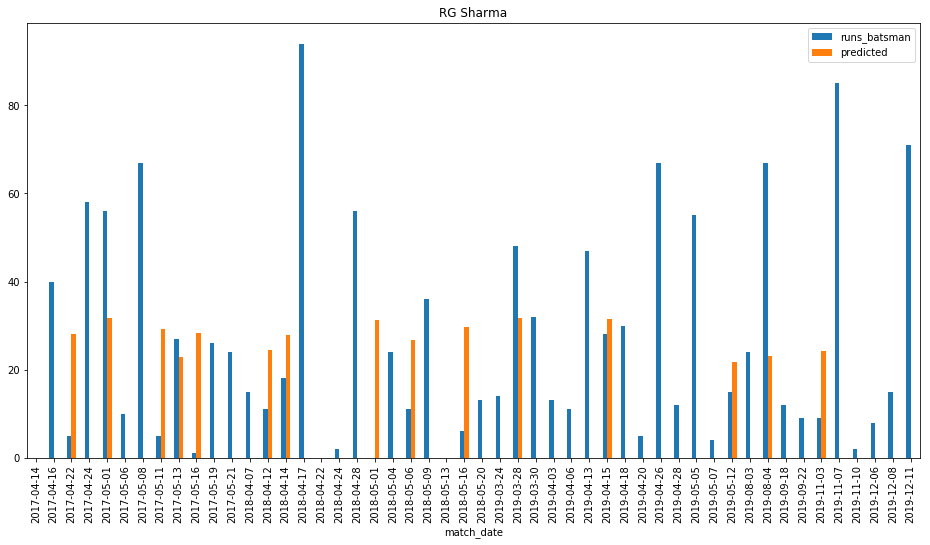

In [50]:
plot_fcst(train, test)